<a href="https://colab.research.google.com/github/ME-UoP-ME421-Oct-2023/E-18-230/blob/main/E_18_230_ME421_ControlSystems_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete Tasks#1 and Task#2 by 5:00PM on 18/01/2024

* Complete Tasks#3 and the Task#4 by 5:00PM on 25/01/2024 and demonstrate the work in the class on 01/02/2024.

* Complete Task#5 by 5:00PM on 08/02/2024 and submit the link to your working repository by midnight 08/02/2024.

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

\begin{align} \dot{\mathbf{o}} = \frac{1}{M} \mathbf{p} \end{align}
\begin{align}\dot{R} = \widehat{\boldsymbol{\omega}} R \end{align}
$ \omega $  - skew-symmetric matrix  


  \begin{align} \dot{\mathbf{p}} = \mathbf{f}^e + \mathbf{f}^u \end{align}
   The rate of change of linear momentum is equal to the sum of external forces \begin{align}\mathbf{f}^e\end{align} and control forces \begin{align}\mathbf{f}^u\end{align}.
 \begin{align} \dot{\boldsymbol{\pi}} = \boldsymbol{\tau}^e + \boldsymbol{\tau}^u \end{align}
   The rate of change of angular momentum is equal to the sum of external torques \begin{align}\boldsymbol{\tau}^e\end{align} and control torques \begin{align}\boldsymbol{\tau}^u\end{align}
 \begin{align}\boldsymbol{\omega} = \mathbb{I}_c^R^{-1} \boldsymbol{\pi}\end{align}
   Here, $ \mathbb{I}_c^R $ is the inertia tensor in the body frame, and $\boldsymbol{\omega}$ is the angular velocity in the body frame.

The superscripts $ e $ and $ u $ denote external and control quantities, respectively.

Note: The inverse of the inertia matrix \begin{align}\mathbb{I}_c^R^{-1}\end{align} is used to relate angular velocity \begin{align}\boldsymbol{\omega}\end{align} and angular momentum \begin{align}\boldsymbol{\pi}\end{align}.

These equations describe the dynamics of a rigid body in space, considering both translational and rotational motion, as well as the influence of external and control forces and torques. The splitting into unmanipulatable \begin{align}\mathbf{f}^e, \boldsymbol{\tau}^e\end{align} and manipulatable (control) \begin{align}\mathbf{f}^u, \boldsymbol{\tau}^u\end{align} parts allows for a clear representation of the forces and torques acting on the body.

#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

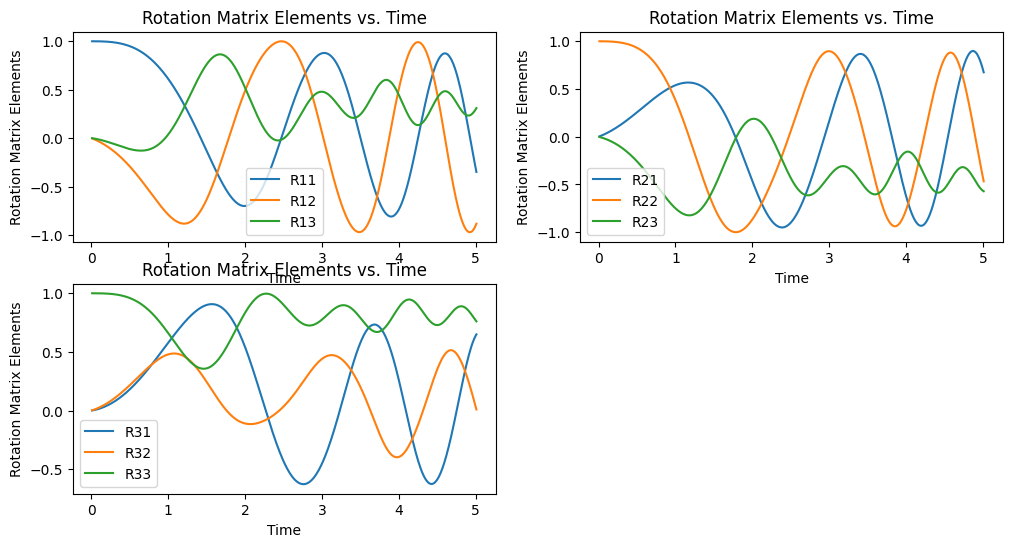

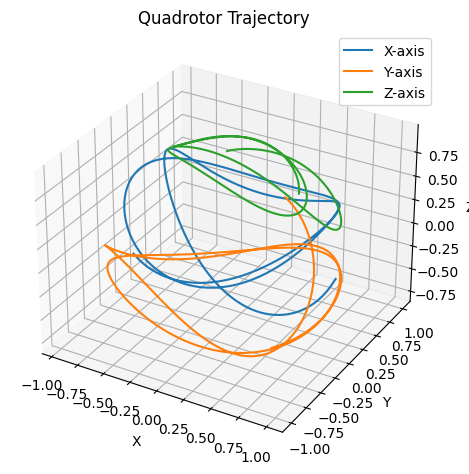

In [4]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def simulate_quadrotor(dt, simulation_time):
    # Quadrotor parameters
    moment_of_inertia = np.array([[0.1, 0, 0], [0, 0.2, 0], [0, 0, 0.3]])  # Moment of inertia matrix
    omega = np.array([0.2, -0.1, 0.3])  # Initial angular velocity

    # Simulation variables
    time = 0.0  # Initial time
    R = np.eye(3)  # Initial rotation matrix

    # Lists to store data
    time_list = []
    rotation_list = []

    while time <= simulation_time:
        # Compute angular acceleration (omega_dot)
        tau = np.array([0.1, -0.2, 0.3])  # Applied torque
        omega_dot = np.linalg.inv(moment_of_inertia).dot(-np.cross(omega, moment_of_inertia.dot(omega)) + tau)

        # Integrate angular velocity (omega)
        omega = omega + omega_dot * dt

        # Compute skew-symmetric matrix (Omega)
        Omega = np.array([[0, -omega[2], omega[1]], [omega[2], 0, -omega[0]], [-omega[1], omega[0], 0]])

        # Update rotation matrix (R)
        R = R.dot(scipy.linalg.expm(Omega * dt))

        # Increment time
        time += dt

        # Store data
        time_list.append(time)
        rotation_list.append(R)

    # Convert rotation_list to numpy array
    rotation_array = np.array(rotation_list)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot rotation matrix elements
    plt.subplot(2, 2, 1)
    plt.plot(time_list, rotation_array[:, 0, 0], label='R11')
    plt.plot(time_list, rotation_array[:, 0, 1], label='R12')
    plt.plot(time_list, rotation_array[:, 0, 2], label='R13')
    plt.xlabel('Time')
    plt.ylabel('Rotation Matrix Elements')
    plt.title('Rotation Matrix Elements vs. Time')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(time_list, rotation_array[:, 1, 0], label='R21')
    plt.plot(time_list, rotation_array[:, 1, 1], label='R22')
    plt.plot(time_list, rotation_array[:, 1, 2], label='R23')
    plt.xlabel('Time')
    plt.ylabel('Rotation Matrix Elements')
    plt.title('Rotation Matrix Elements vs. Time')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(time_list, rotation_array[:, 2, 0], label='R31')
    plt.plot(time_list, rotation_array[:, 2, 1], label='R32')
    plt.plot(time_list, rotation_array[:, 2, 2], label='R33')
    plt.xlabel('Time')
    plt.ylabel('Rotation Matrix Elements')
    plt.title('Rotation Matrix Elements vs. Time')
    plt.legend()

    # Plot 3D trajectory of quadrotor
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(rotation_array[:, 0, 0], rotation_array[:, 0, 1], rotation_array[:, 0, 2], label='X-axis')
    ax.plot(rotation_array[:, 1, 0], rotation_array[:, 1, 1], rotation_array[:, 1, 2], label='Y-axis')
    ax.plot(rotation_array[:, 2, 0], rotation_array[:, 2, 1], rotation_array[:, 2, 2], label='Z-axis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Quadrotor Trajectory')
    ax.legend()

    # Show all plots
    plt.tight_layout()
    plt.show()

# Example usage
dt = 0.01  # Time step for integration
simulation_time = 5.0  # Total simulation time
simulate_quadrotor(dt, simulation_time)

#Task#3

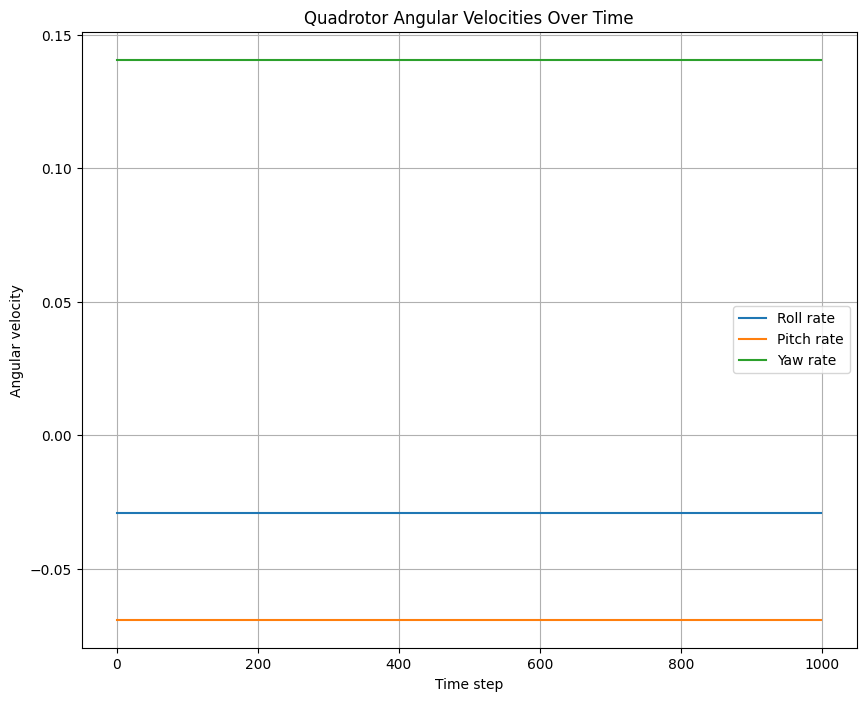

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hat function
def hat(v):
    return np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])

# Constants
m = 1.0  # mass of the quadrotor
g = 9.81  # acceleration due to gravity
J = np.diag([0.1, 0.1, 0.2])  # inertia matrix
dt = 0.01  # time step

# PID gains
Kp = 1.0
Ki = 0.5
Kd = 0.1

# PID errors
integral_error = np.zeros(3)
prev_error = np.zeros(3)

# Initial state
R = np.eye(3)  # orientation
omega = np.array([0.1, 0.2, 0.3])  # angular velocity

# Lists to store data for plotting
omega_data = []

# Simulation loop
for _ in range(1000):
    # Compute error
    error = 0.5 * (np.dot(R.T, np.eye(3)) - np.dot(np.eye(3).T, R))
    error = np.array([error[2,1], error[0,2], error[1,0]])  # Convert to vector

    # Compute control input (PID controller)
    integral_error += error * dt
    derivative_error = (error - prev_error) / dt
    tau = Kp*error + Ki*integral_error + Kd*derivative_error

    # Update state
    omega_dot = np.linalg.inv(J) @ (tau - np.cross(omega, J @ omega))
    omega += omega_dot * dt
    R_dot = np.dot(R, hat(omega))
    R += R_dot * dt

    # Store data for plotting
    omega_data.append(omega)

# Convert list to numpy array for easier slicing
omega_data = np.array(omega_data)

# Plot data
plt.figure(figsize=(10, 8))
plt.plot(omega_data[:, 0], label='Roll rate')
plt.plot(omega_data[:, 1], label='Pitch rate')
plt.plot(omega_data[:, 2], label='Yaw rate')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Angular velocity')
plt.title('Quadrotor Angular Velocities Over Time')
plt.grid(True)
plt.show()


import numpy as np
import plotly.graph_objects as go

# Create quadrotor vertices
vertices = np.array([
    [-0.5, -0.5, 0],
    [0.5, -0.5, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

# Define rotation angles
theta = np.linspace(0, 2 * np.pi, 100)

# Create figure
fig = go.Figure()

# Initialize roll, pitch, yaw path traces
roll_path_trace = go.Scatter3d(x=[], y=[], z=[], mode='lines', name='Roll Path')
pitch_path_trace = go.Scatter3d(x=[], y=[], z=[], mode='lines', name='Pitch Path')
yaw_path_trace = go.Scatter3d(x=[], y=[], z=[], mode='lines', name='Yaw Path')

# Add quadrotor scatter plot
fig.add_trace(go.Scatter3d(
    x=vertices[:, 0],
    y=vertices[:, 1],
    z=vertices[:, 2],
    mode='markers',
    name='Quadrotor'
))

# Add quadrotor wireframe plot
fig.add_trace(go.Scatter3d(
    x=[],
    y=[],
    z=[],
    mode='lines',
    name='Wireframe'
))

# Add roll, pitch, yaw arrows
fig.add_trace(go.Scatter3d(
    x=[],
    y=[],
    z=[],
    mode='lines',
    name='Roll'
))

fig.add_trace(go.Scatter3d(
    x=[],
    y=[],
    z=[],
    mode='lines',
    name='Pitch'
))

fig.add_trace(go.Scatter3d(
    x=[],
    y=[],
    z=[],
    mode='lines',
    name='Yaw'
))

# Add roll, pitch, yaw path traces
fig.add_trace(roll_path_trace)
fig.add_trace(pitch_path_trace)
fig.add_trace(yaw_path_trace)

# Set layout
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-2, 2]),
        yaxis=dict(range=[-2, 2]),
        zaxis=dict(range=[0, 10]),
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.25, y=1.25, z=1.25))
    ),
    title='Quadrotor Motion Visualization',
    showlegend=True
)

# Update function for animation frames
def update_frame(t):
    # Increment yaw angle
    yaw = t * 0.01

    # Create yaw rotation matrix
    rotation_matrix = np.array([
        [np.cos(yaw), -np.sin(yaw), 0],
        [np.sin(yaw), np.cos(yaw), 0],
        [0, 0, 1]
    ])
    vertices_rotated = np.dot(rotation_matrix, vertices.T).T
    vertices_translated = vertices_rotated + np.array([0, 0, t])

    # Create wireframe plot
    edges = [
        [0, 1], [1, 2], [2, 0],  # Base
        [0, 3], [1, 3], [2, 3]   # Connectors
    ]

    x_edges = vertices_translated[:, 0][edges]
    y_edges = vertices_translated[:, 1][edges]
    z_edges = vertices_translated[:, 2][edges]

    # Update scatter plot
    fig.data[0].x = vertices_translated[:, 0]
    fig.data[0].y = vertices_translated[:, 1]
    fig.data[0].z = vertices_translated[:, 2]

    # Update wireframe plot
    fig.data[1].x = x_edges.flatten()
    fig.data[1].y = y_edges.flatten()
    fig.data[1].z = z_edges.flatten()

    # Update roll, pitch, yaw arrows
    roll_arrow = np.dot(rotation_matrix, np.array([1, 0, 0]))
    pitch_arrow = np.dot(rotation_matrix, np.array([0, 1, 0]))
    yaw_arrow = np.dot(rotation_matrix, np.array([0, 0, 1]))

    fig.data[2].x = [vertices_translated[0, 0], vertices_translated[0, 0] + roll_arrow[0]]
    fig.data[2].y = [vertices_translated[0, 1], vertices_translated[0, 1] + roll_arrow[1]]
    fig.data[2].z = [vertices_translated[0, 2], vertices_translated[0, 2] + roll_arrow[2]]

    fig.data[3].x = [vertices_translated[1, 0], vertices_translated[1, 0] + pitch_arrow[0]]
    fig.data[3].y = [vertices_translated[1, 1], vertices_translated[1, 1] + pitch_arrow[1]]
    fig.data[3].z = [vertices_translated[1, 2], vertices_translated[1, 2] + pitch_arrow[2]]

    fig.data[4].x = [vertices_translated[2, 0], vertices_translated[2, 0] + yaw_arrow[0]]
    fig.data[4].y = [vertices_translated[2, 1], vertices_translated[2, 1] + yaw_arrow[1]]
    fig.data[4].z = [vertices_translated[2, 2], vertices_translated[2, 2] + yaw_arrow[2]]

    # Update roll, pitch, yaw path traces
    fig.data[5].x = np.append(fig.data[5].x, vertices_translated[0, 0])
    fig.data[5].y = np.append(fig.data[5].y, vertices_translated[0, 1])
    fig.data[5].z = np.append(fig.data[5].z, vertices_translated[0, 2])

    fig.data[6].x = np.append(fig.data[6].x, vertices_translated[1, 0])
    fig.data[6].y = np.append(fig.data[6].y, vertices_translated[1, 1])
    fig.data[6].z = np.append(fig.data[6].z, vertices_translated[1, 2])

    fig.data[7].x = np.append(fig.data[7].x, vertices_translated[2, 0])
    fig.data[7].y = np.append(fig.data[7].y, vertices_translated[2, 1])
    fig.data[7].z = np.append(fig.data[7].z, vertices_translated[2, 2])

# Create animation frames
frames = [go.Frame(data=[go.Mesh3d(x=[], y=[], z=[])], name=f'frame_{i}') for i in range(len(theta))]

# Update each frame
for i, frame in enumerate(frames):
    t = theta[i]
    update_frame(t)
    frame.data = fig.data

# Add frames to animation
fig.frames = frames

# Set animation settings
animation_settings = dict(
    frame=dict(duration=100, redraw=True),
    fromcurrent=True,
    transition=dict(duration=0),
)

# Set up buttons for animation control
buttons = [
    dict(label='Play',
         method='animate',
         args=[None, animation_settings]),
    dict(label='Pause',
         method='animate',
         args=[[None], animation_settings]),
    dict(label='Reset',
         method='animate',
         args=[None, dict(frame=dict(duration=0, redraw=True), fromcurrent=True, transition=dict(duration=0))])
]

# Add buttons to the layout
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        buttons=buttons,
        showactive=False,
        x=0.1,
        y=0,
        xanchor='right',
        yanchor='top'
    )]
)

# Show the figure
fig.show()

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

#Task#4

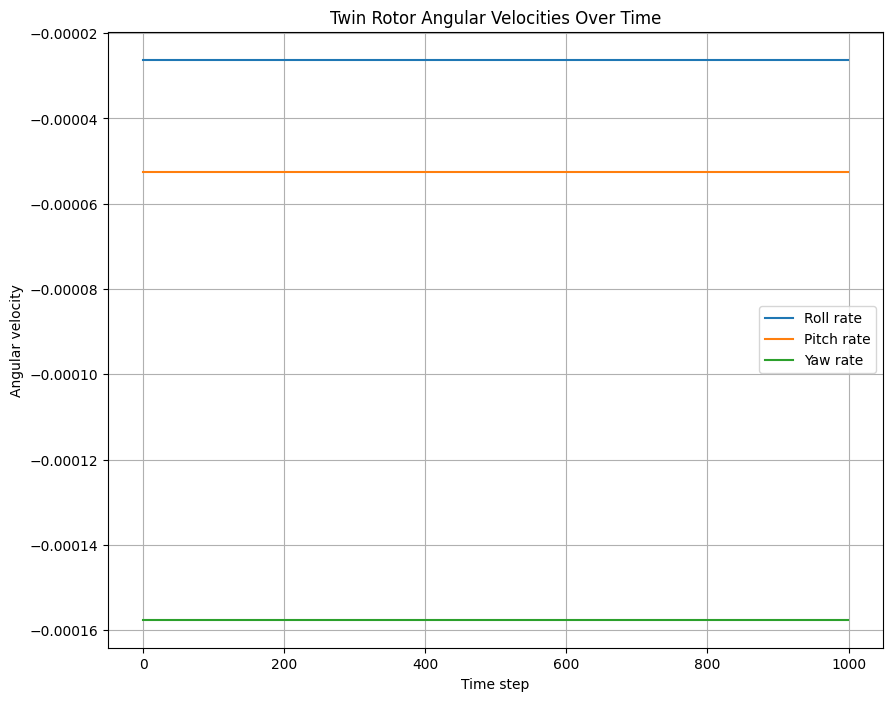

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hat function
def hat(v):
    return np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])

# Constants
m = 1.0  # mass of the twin rotor system
g = 9.81  # acceleration due to gravity
J = np.diag([0.1, 0.1, 0.2])  # inertia matrix
dt = 0.01  # time step

# PID gains
Kp = 1.0
Ki = 0.5
Kd = 0.1

# PID errors
integral_error = np.zeros(3)
prev_error = np.zeros(3)

# Initial state
R = np.eye(3)  # orientation
omega = np.array([0.1, 0.2, 0.3])  # angular velocity

# Lists to store data for plotting
omega_data = []

# Simulation loop
for i in range(1000):
    # Compute error
    if i == 500:  # Apply impulse at time step 500
        desired_omega = np.array([1.0, 0.0, 0.0])  # Change desired angular velocity
    else:
        desired_omega = np.array([0.0, 0.0, 0.0])  # Keep desired angular velocity constant
    error = desired_omega - omega

    # Compute control input (PID controller)
    integral_error += error * dt
    derivative_error = (error - prev_error) / dt
    tau = Kp*error + Ki*integral_error + Kd*derivative_error

    # Update state
    omega_dot = np.linalg.inv(J) @ (tau - np.cross(omega, J @ omega))
    omega += omega_dot * dt
    R_dot = np.dot(R, hat(omega))
    R += R_dot * dt

    # Store data for plotting
    omega_data.append(omega)

# Convert list to numpy array for easier slicing
omega_data = np.array(omega_data)

# Plot data
plt.figure(figsize=(10, 8))
plt.plot(omega_data[:, 0], label='Roll rate')
plt.plot(omega_data[:, 1], label='Pitch rate')
plt.plot(omega_data[:, 2], label='Yaw rate')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Angular velocity')
plt.title('Twin Rotor Angular Velocities Over Time')
plt.grid(True)
plt.show()


Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing the twin rotor setup in the lab.

#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.